In [2]:
pwd

'c:\\Users\\Admin\\Documents\\LightningHydraTEst\\lightning-hydra-template\\notebooks'

In [3]:
cd ../

c:\Users\Admin\Documents\LightningHydraTEst\lightning-hydra-template


In [81]:
import torch
from collections import OrderedDict
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import albumentations
import cv2
import face_recognition as fc
import albumentations.pytorch
import torch_directml
import torchvision


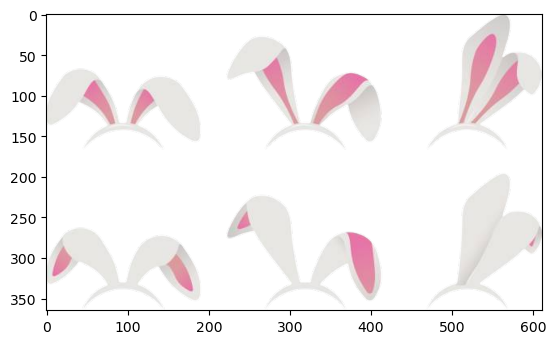

In [5]:
bunny_ear = Image.open('./ibug_300W_large_face_landmark_dataset/bunny_ear.png')
plt.imshow(bunny_ear)

In [7]:
bunny_ear_array = np.array(bunny_ear)
print(bunny_ear_array.shape)
print(bunny_ear_array.dtype)

(365, 612, 4)
uint8


torch.Size([4, 365, 612])
tensor(255, dtype=torch.uint8)


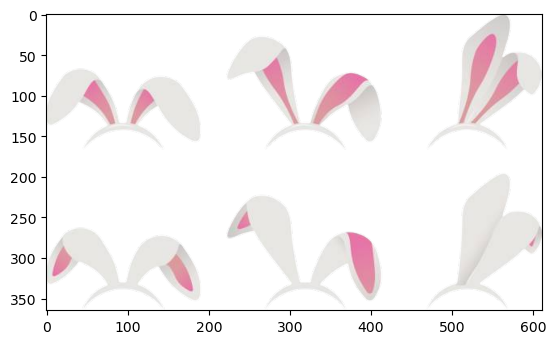

In [8]:
bunny_ear_tensor = albumentations.pytorch.ToTensorV2()(image = bunny_ear_array)['image']
print(bunny_ear_tensor.shape)
print(torch.max(bunny_ear_tensor))
plt.imshow(bunny_ear_tensor.permute(1, 2, 0))

In [9]:
channel, height, width = bunny_ear_tensor.shape

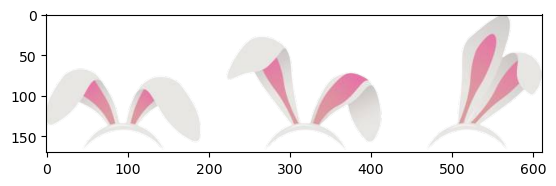

In [60]:
row1 = bunny_ear_tensor[:, :170, :]
plt.imshow(row1.permute(1, 2, 0))

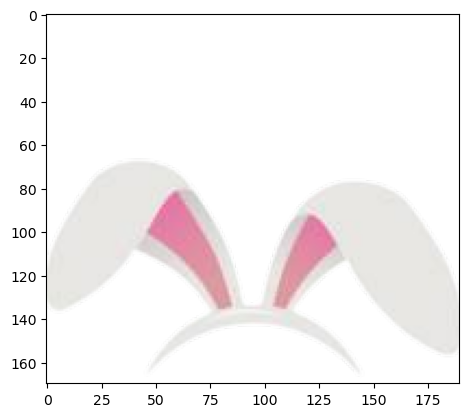

In [61]:
image1 = row1[:, :, :190]
plt.imshow(image1.permute(1, 2, 0))

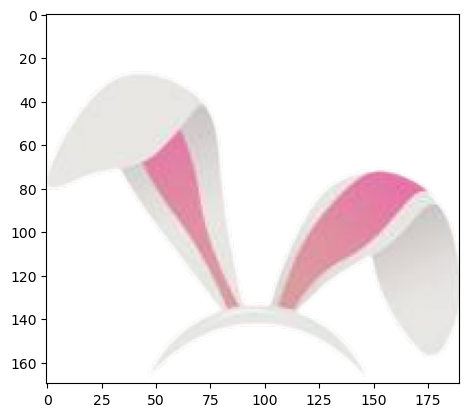

In [65]:
image2 = row1[:, :, 223: 223 + 190]
plt.imshow(image2.permute(1, 2, 0))

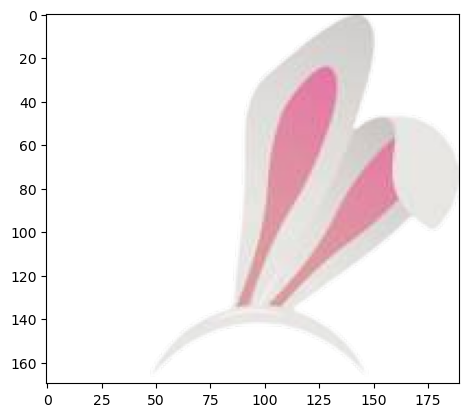

In [66]:
image3 = row1[:, :, 422: 422 + 190]
plt.imshow(image3.permute(1, 2, 0))

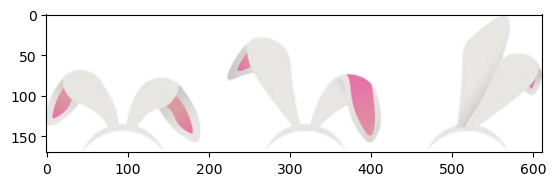

In [59]:
row2 = bunny_ear_tensor[:, 195:, :]
plt.imshow(row2.permute(1, 2, 0))

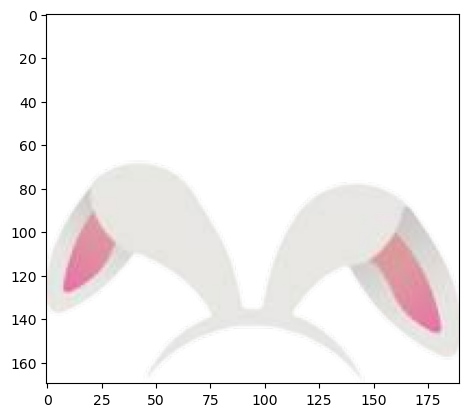

In [74]:
image4 = row2[:, :, :190]
plt.imshow(image4.permute(1, 2, 0))

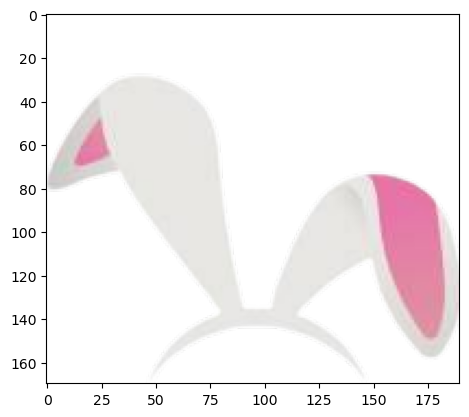

In [75]:
image5 = row2[:, :, 223: 223 + 190]
plt.imshow(image5.permute(1, 2, 0))

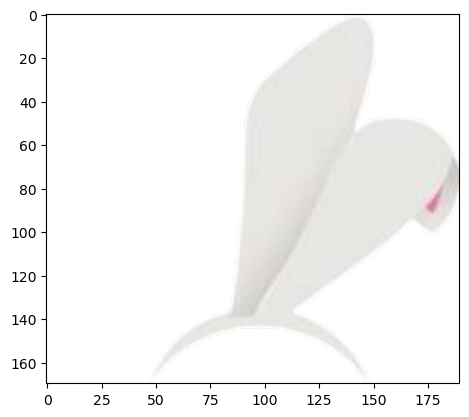

In [77]:
image6 = row2[:, :, 422: 422 + 190]
plt.imshow(image6.permute(1, 2, 0))

In [84]:
print(row1.dtype, row2.dtype)

torch.uint8 torch.uint8


In [91]:
bunny_ear_sprite = [image1, image2, image3, image4, image5, image6]

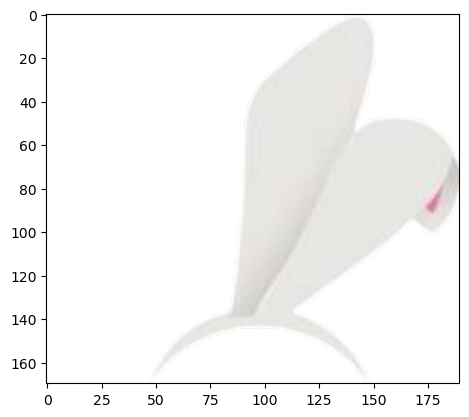

In [103]:
plt.imshow(bunny_ear_sprite[5].permute(1, 2, 0))

In [107]:
dummy = torch.zeros(size = (4, 170, 190 * 6), dtype = torch.uint8)

tensor(255, dtype=torch.uint8)


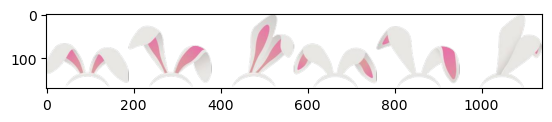

In [108]:
for i in range(6):
    dummy[:, :, 190 * i: 190 * (i + 1)] = bunny_ear_sprite[i]
print(torch.max(dummy[3, :, :]))

plt.imshow(dummy.permute(1, 2, 0))

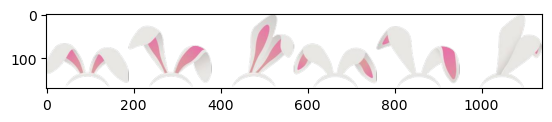

In [109]:
sprite = T.ToPILImage()(dummy)
sprite.save('./ibug_300W_large_face_landmark_dataset/bunny_ear_sprite.png')
plt.imshow(sprite)

In [ ]:
image = Image.open('./crop_image')